<a href="https://colab.research.google.com/github/ndViet27/KPDL_Nhom3_Clustering1/blob/main/KMeans_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dữ liệu từ Drive

In [1]:
# prompt: import csv file from drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file and the path to it in your Google Drive.
# Example: '/content/drive/MyDrive/Colab Notebooks/your_file.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes/diabetes.csv')

# Now you can work with the DataFrame 'df'
df.head(10)

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Chuyển cột Outcome từ Int64 sang Category

In [3]:
df['Outcome'] = df['Outcome'].astype('category', copy=False)

def convert_outcome(x):
  if x == 0:
    return 'Non-Diabetic'
  else:
    return 'Diabetic'

df['Outcome'] = df['Outcome'].apply(convert_outcome)


In [4]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
5,5,116,74,0,0,25.6,0.201,30,Non-Diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
7,10,115,0,0,0,35.3,0.134,29,Non-Diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic
9,8,125,96,0,0,0.0,0.232,54,Diabetic


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Phân cụm KMeans với Glucose và BMI

In [6]:
import plotly.express as px

fig = px.scatter(df, x='Glucose', y='BMI', color='Outcome')
fig.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

cluster_cols = ['Glucose', 'BMI']
#create subset
X = np.array(df[cluster_cols])
# X = StandardScaler().fit_transform(X)
print(X)


[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [34]:
best_cluster_number = 9
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

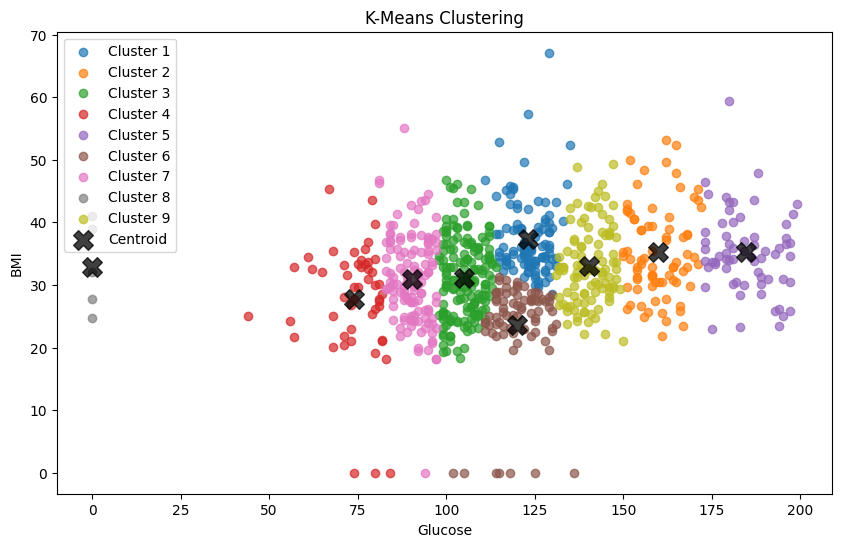

In [35]:
import matplotlib.pyplot as plt

def drawplt(data, centers, kmeans):
    plt.figure(figsize=(10, 6))
    plt.title("K-Means Clustering")
    for cluster_id in range(len(centers)):
        cluster_points = data[kmeans.labels_ == cluster_id] #lấy ra các điểm theo cụm tương ứng
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', alpha=0.7)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Centroid', s=200, alpha=0.75)
    plt.legend()
    plt.xlabel("Glucose")
    plt.ylabel("BMI")

    plt.show()

drawplt(X, centroids, kmeans)

In [36]:
# prompt: drawplt with px
def drawplt_px(data, centers, kmeans):
    df = pd.DataFrame(data, columns=['Glucose', 'BMI'])
    df['Cluster'] = kmeans.labels_
    df_centers = pd.DataFrame(centers, columns=['Glucose', 'BMI'])
    df_centers['Cluster'] = range(len(centers))

    fig = px.scatter(df, x='Glucose', y='BMI', color='Cluster', title='K-Means Clustering',color_continuous_scale='Viridis')
    fig.add_scatter(x=df_centers['Glucose'], y=df_centers['BMI'], mode='markers', marker=dict(size=15, color='red', symbol='x'), name='Centroids')
    fig.show()


drawplt_px(X, centroids, kmeans)

# Biểu diễn toàn bộ các thuộc tính của các cụm vừa tìm được



In [39]:
df_numeric = df.drop('Outcome', axis=1)
df_numeric['Cluster'] = kmeans.labels_
df_numeric.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,6,148,72,35,0,33.6,0.627,50,8
1,1,85,66,29,0,26.6,0.351,31,6
2,8,183,64,0,0,23.3,0.672,32,4
3,1,89,66,23,94,28.1,0.167,21,6
4,0,137,40,35,168,43.1,2.288,33,8
5,5,116,74,0,0,25.6,0.201,30,5
6,3,78,50,32,88,31.0,0.248,26,3
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,4
9,8,125,96,0,0,0.0,0.232,54,5


In [38]:
df_numeric.groupby('Cluster').mean().reset_index()

,Cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.653846,123.375000,69.096154,23.500000,97.355769,37.341346,0.491048,32.076923
1,1,5.363636,159.792208,75.363636,23.168831,139.467532,35.311688,0.489130,37.896104
2,2,3.556886,105.161677,68.820359,20.952096,58.658683,31.166467,0.434186,31.239521
3,3,3.274510,73.843137,63.098039,16.843137,25.764706,27.674510,0.424176,29.333333
4,4,4.123077,184.676923,73.600000,24.953846,163.676923,35.213846,0.646738,38.230769
5,5,4.142857,120.116883,65.792208,12.337662,60.038961,23.635065,0.441455,33.649351
6,6,3.198347,90.438017,65.917355,21.173554,42.504132,30.936364,0.457843,29.363636
7,7,2.800000,0.000000,67.600000,29.600000,4.600000,32.880000,0.380200,28.600000
8,8,4.069307,140.475248,71.376238,18.851485,87.960396,33.020792,0.457396,37.524752


In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=1, subplot_titles=('<b>Pregnancies in clusters</b>',
                                                    '<b>Glucose in clusters</b>',
                                                    '<b>Blood Pressure in clusters</b>',
                                                    '<b>Skin Thickness in clusters</b>',
                                                    '<b>Insulin in clusters</b>',
                                                    '<b>BMI in clusters</b>',
                                                    '<b>Diabetes Pedigree Func. in clusters</b>',
                                                    '<b>Age in clusters</b>'
                                                   ))

fig.add_trace(go.Box(y=df_numeric['Pregnancies'], x=df_numeric['Cluster']), row=1, col=1)
fig.add_trace(go.Box(y=df_numeric['Glucose'], x=df_numeric['Cluster']), row=2, col=1)
fig.add_trace(go.Box(y=df_numeric['BloodPressure'], x=df_numeric['Cluster']), row=3, col=1)
fig.add_trace(go.Box(y=df_numeric['SkinThickness'], x=df_numeric['Cluster']), row=4, col=1)
fig.add_trace(go.Box(y=df_numeric['Insulin'], x=df_numeric['Cluster']), row=5, col=1)
fig.add_trace(go.Box(y=df_numeric['BMI'], x=df_numeric['Cluster']), row=6, col=1)
fig.add_trace(go.Box(y=df_numeric['DiabetesPedigreeFunction'], x=df_numeric['Cluster']), row=7, col=1)
fig.add_trace(go.Box(y=df_numeric['Age'], x=df_numeric['Cluster']), row=8, col=1)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=900,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()